In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [289]:
# -------------------------
# 1. Create Sample Data
# -------------------------
df = pd.DataFrame({
    'Customer_ID': range(1, 11),
    'Age': [25, 27, np.nan, 35, 40, 32, 28, None, 26, 150],  # Missing + outlier
    'Income': [30000, 35000, 32000, 45000, None, 80000, 34000, 37000, 40000, 120000],
    'Gender': ['Male','Female','Female','Male','Male', 'Female','Male','Female','Male','Female'],
    'City': ['Mumbai','Pune','Pune','Mumbai','Mumbai','Pune','Nashik','Nashik','Mumbai','Jalgaon'],
    'Purchased': [1,0,0,1,0,1,0,0,1,1]
})

In [290]:
df.shape

(10, 6)

In [291]:

print("\nOriginal Data:\n", df)



Original Data:
    Customer_ID    Age    Income  Gender     City  Purchased
0            1   25.0   30000.0    Male   Mumbai          1
1            2   27.0   35000.0  Female     Pune          0
2            3    NaN   32000.0  Female     Pune          0
3            4   35.0   45000.0    Male   Mumbai          1
4            5   40.0       NaN    Male   Mumbai          0
5            6   32.0   80000.0  Female     Pune          1
6            7   28.0   34000.0    Male   Nashik          0
7            8    NaN   37000.0  Female   Nashik          0
8            9   26.0   40000.0    Male   Mumbai          1
9           10  150.0  120000.0  Female  Jalgaon          1


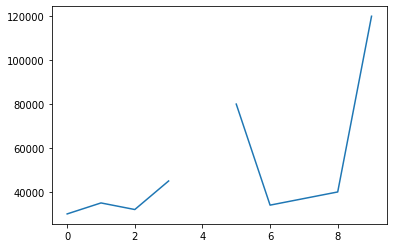

In [292]:
plt.plot(df['Income'])

<Axes: >

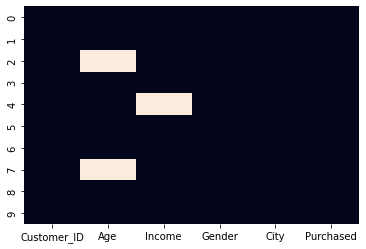

In [293]:
sns.heatmap(df.isnull(),cbar=False)

<Axes: xlabel='Age'>

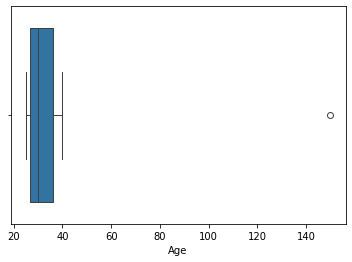

In [294]:
sns.boxplot(x=df['Age'])

In [295]:

Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outlier_clean=df[(df['Age']>=lower)&(df['Age']<=upper)]

<Axes: xlabel='Age'>

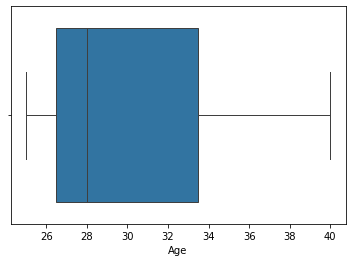

In [296]:
sns.boxplot(x=outlier_clean['Age'])


--- Data Cleansing ---
Cleaned Data:
    Customer_ID    Age    Income  Gender     City  Purchased
0            1   25.0   30000.0    Male   Mumbai          1
1            2   27.0   35000.0  Female     Pune          0
2            3    NaN   32000.0  Female     Pune          0
3            4   35.0   45000.0    Male   Mumbai          1
4            5   40.0       NaN    Male   Mumbai          0
5            6   32.0   80000.0  Female     Pune          1
6            7   28.0   34000.0    Male   Nashik          0
7            8    NaN   37000.0  Female   Nashik          0
8            9   26.0   40000.0    Male   Mumbai          1
9           10  150.0  120000.0  Female  Jalgaon          1


<ipython-input-297-a31fe2ee88e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_clean['Age'] = outlier_clean['Age'].fillna(outlier_clean['Age'].median())
<ipython-input-297-a31fe2ee88e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_clean['Income'] = outlier_clean['Income'].fillna(outlier_clean['Income'].mean())


<Axes: >

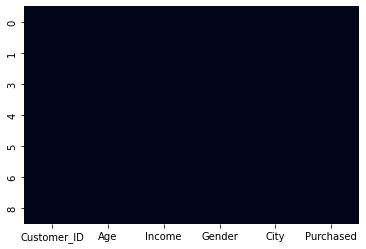

In [297]:
# -------------------------
# 2. Data Cleansing
# -------------------------
print("\n--- Data Cleansing ---")
outlier_clean['Age'] = outlier_clean['Age'].fillna(outlier_clean['Age'].median())
outlier_clean['Income'] = outlier_clean['Income'].fillna(outlier_clean['Income'].mean())


print("Cleaned Data:\n", df)
sns.heatmap(outlier_clean.isnull(),cbar=False)

In [298]:
outlier_clean.describe()

,Customer_ID,Age,Income,Purchased
count,7.000000,7.000000,7.000000,7.000000
mean,4.857143,30.428571,44000.000000,0.571429
std,2.794553,5.503246,16782.927834,0.534522
min,1.000000,25.000000,30000.000000,0.000000
25%,3.000000,26.500000,34500.000000,0.000000
50%,5.000000,28.000000,40000.000000,1.000000
75%,6.500000,33.500000,44500.000000,1.000000
max,9.000000,40.000000,80000.000000,1.000000


In [299]:
outlier_clean.columns

Index(['Customer_ID', 'Age', 'Income', 'Gender', 'City', 'Purchased'], dtype='object')

In [304]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
outlier_clean['City']=label_encoder.fit_transform(outlier_clean['City'])



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [305]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
outlier_clean=encoder.fit_transform(outlier_clean[['Gender']])
outlier_clean.shape



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [306]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(outlier_clean)


,feature_range,"(0, ...)"
,copy,True
,clip,False


In [307]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(outlier_clean)

,copy,True
,with_mean,True
,with_std,True


In [328]:
# Split data into training and testing sets

df=[features+['Purchased']].dropna()

features=['Customer_ID', 'Age', 'Income', 'Gender', 'City', 'Purchased']
X=outlier_clean[features]
y=outlier_clean['Purchsed]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.feature_selection import SelectKBest,f_classif
k_best=SelectKBest(score_func=f_classif,k=5)
fit=k_best.fit(X,y)
X.columns[fit.get_support(indices=True)].tolist()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [7, 10]

In [320]:
model=SVC()
X_train_model=model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Mumbai'